**Mateo Alexander**

**PLAN 6113: Exploring Urban Data with Machine Learning**

In [ ]:
** **

In [ ]:
**Problem Set 4**

In [52]:
"""
For this weeks problem set you have a free hand to develop a simple linear model for a continuous
or discrete numeric target variable. Data should be downloaded and cleaned by you and come from Census,
NYC Open Data etc. Your model should have at least four features and should start with an OLS model and
should evaluate the model as we did in our week four class, using the week 4 lab code as an example.

Check fit with R-squared score
Compare training and test scores for gap
Consider n
Interpret coefficients
Check assumptions
For both endogeneity and i.i.d violation (scatter vs. y)
For normal distribution (histogram)
For multicollinearity among IVs (VIF)
If appropriate examine p-values for hypothesis testing
If appropriate try to improve performance with a Ridge Regression"""

'\nProblem Set 4:\nFor this weeks problem set you have a free hand to develop a simple linear model for a continuous\nor discrete numeric target variable. Data should be downloaded and cleaned by you and come from Census,\nNYC Open Data etc. Your model should have at least four features and should start with an OLS model and\nshould evaluate the model as we did in our week four class, using the week 4 lab code as an example.\n\nCheck fit with R-squared score\nCompare training and test scores for gap\nConsider n\nInterpret coefficients\nCheck assumptions\nFor both endogeneity and i.i.d violation (scatter vs. y)\nFor normal distribution (histogram)\nFor multicollinearity among IVs (VIF)\nIf appropriate examine p-values for hypothesis testing\nIf appropriate try to improve performance with a Ridge Regression'

In [43]:
"""You should submit an Ipython file, and use a markdown field to very briefly note thoughts at each stage of the evaluation,
and finally what you think appropriate next steps would be for improving the model. If you are not sure how to go about getting
appropriate data please contact me."""

'You should submit an Ipython file, and use a markdown field to very briefly note thoughts at each stage of the evaluation,\nand finally what you think appropriate next steps would be for improving the model. If you are not sure how to go about getting\nappropriate data please contact me.'

In [46]:
"""
Data downloaded from Kaggle: https://www.kaggle.com/datasets/crisparada/brazilian-cities?resource=download
'CITY' is the city name
'ESTIMATED_POP' is the total city population
'IBGE_15-59' is the total population between 15 and 59 years
'COMP_TOT' is the total number of businesses in a city
'COMP_A'is the total number of agricultural businesses
'COMP_F' is the total number of construction businesses
'COMP_I' is the total number of food businesses
'Pr_Bank' is the total number of private banks
'Pu_Bank' is the total number of public banks
'Total_Bank' is the total number of poth private and public banks
"""

"\nData downloaded from Kaggle: https://www.kaggle.com/datasets/crisparada/brazilian-cities?resource=download\n'CITY' is the city name\n'ESTIMATED_POP' is the total city population\n'IBGE_15-59' is the total population between 15 and 59 years\n'COMP_TOT' is the total number of businesses in a city\n'COMP_A'is the total number of agricultural businesses\n'COMP_F' is the total number of construction businesses\n'COMP_I' is the total number of food businesses\n'Pr_Bank' is the total number of private banks\n'Pu_Bank' is the total number of public banks\n'Total_Bank' is the total number of poth private and public banks\n"

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
Brazilian_Cities_2022_Data = pd.read_csv('Brazilian_City_Data_2022.csv')
Brazilian_Cities_2022_Data

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0.0,0.0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0.0,0.0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584.0,67091904.0,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384.0,800078483.0,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716.0,371922572.0,6928,2953,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,RS,0,3665,3665,0,1222,548,674,1525,...,2,0.0,117198141.0,1435,400,0,0,0,0,1
5574,Ângulo,PR,0,2859,2844,15,929,737,192,2246,...,0,0.0,0.0,898,415,0,0,0,0,1
5575,Érico Cardoso,BA,0,10859,10859,0,2659,542,2117,1999,...,0,0.0,0.0,655,1020,0,0,0,0,1
5576,Óbidos,PA,0,49333,49324,9,11263,6068,5195,25295,...,3,0.0,184494811.0,938,4985,0,0,0,0,1


In [8]:
columns_to_copy = ['CITY','ESTIMATED_POP', 'IBGE_15-59', 'COMP_TOT', 'COMP_A', 'COMP_F', 'COMP_I', 'Pr_Bank', 'Pu_Bank', 'MAC']
Brazilian_McDonalds_Test_Data = Brazilian_Cities_2022_Data[[
    column for column in columns_to_copy if column in Brazilian_Cities_2022_Data.columns
]].copy()
Brazilian_McDonalds_Test_Data

,CITY,ESTIMATED_POP,IBGE_15-59,COMP_TOT,COMP_A,COMP_F,COMP_I,Pr_Bank,Pu_Bank,MAC
0,Abadia De Goiás,8583,3542,284,5,29,4,0,0,0
1,Abadia Dos Dourados,6972,2709,476,6,34,28,0,0,0
2,Abadiânia,19614,6896,288,5,7,57,1,1,0
3,Abaetetuba,156292,53516,931,4,27,31,2,4,0
4,Abaeté,23223,11979,621,18,20,30,2,2,0
...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,3573,979,180,7,5,11,0,2,0
5574,Ângulo,2927,1448,105,2,5,5,0,0,0
5575,Érico Cardoso,10662,1293,61,2,1,0,0,0,0
5576,Óbidos,51964,14708,376,5,7,8,0,3,0


In [10]:
Brazilian_McDonalds_Test_Data['Total_Bank'] = Brazilian_McDonalds_Test_Data['Pr_Bank'] + Brazilian_McDonalds_Test_Data['Pu_Bank']
Brazilian_McDonalds_Test_Data

,CITY,ESTIMATED_POP,IBGE_15-59,COMP_TOT,COMP_A,COMP_F,COMP_I,Pr_Bank,Pu_Bank,MAC,Total_Bank
0,Abadia De Goiás,8583,3542,284,5,29,4,0,0,0,0
1,Abadia Dos Dourados,6972,2709,476,6,34,28,0,0,0,0
2,Abadiânia,19614,6896,288,5,7,57,1,1,0,2
3,Abaetetuba,156292,53516,931,4,27,31,2,4,0,6
4,Abaeté,23223,11979,621,18,20,30,2,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,3573,979,180,7,5,11,0,2,0,2
5574,Ângulo,2927,1448,105,2,5,5,0,0,0,0
5575,Érico Cardoso,10662,1293,61,2,1,0,0,0,0,0
5576,Óbidos,51964,14708,376,5,7,8,0,3,0,3


In [14]:
# Predictor Variables
X = Brazilian_McDonalds_Test_Data[['ESTIMATED_POP', 'IBGE_15-59', 'COMP_TOT', 'COMP_A', 'COMP_F', 'COMP_I', 'Pr_Bank', 'Pu_Bank', 'Total_Bank']]
X = sma.add_constant(X)  # Adds a constant term to the predictor

# Establishing the Dependent variable
y = Brazilian_McDonalds_Test_Data['MAC']

# Fitting the model
model = sma.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MAC   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 2.357e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:47:40   Log-Likelihood:                -2282.9
No. Observations:                5578   AIC:                             4584.
Df Residuals:                    5569   BIC:                             4643.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0147      0.007     -2.180

In [16]:
# Predictor Variables
X = Brazilian_McDonalds_Test_Data[['IBGE_15-59', 'COMP_TOT', 'COMP_A', 'COMP_F', 'COMP_I', 'Pr_Bank', 'Pu_Bank', 'Total_Bank']]
X = sma.add_constant(X)  # Adds a constant term to the predictor

# Establishing the Dependent variable
y = Brazilian_McDonalds_Test_Data['MAC']

# Fitting the model
model = sma.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MAC   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 2.651e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:47:44   Log-Likelihood:                -2327.5
No. Observations:                5578   AIC:                             4671.
Df Residuals:                    5570   BIC:                             4724.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.007     -0.438      0.6

In [18]:
# Predictor Variables
X = Brazilian_McDonalds_Test_Data[['IBGE_15-59','COMP_A', 'COMP_F', 'COMP_I','Total_Bank']]
X = sma.add_constant(X)  # Adds a constant term to the predictor

# Establishing the Dependent variable
y = Brazilian_McDonalds_Test_Data['MAC']

# Fitting the model
model = sma.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MAC   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.951e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:47:47   Log-Likelihood:                -2946.5
No. Observations:                5578   AIC:                             5905.
Df Residuals:                    5572   BIC:                             5945.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.007      2.247      0.0

In [38]:
X = Brazilian_McDonalds_Test_Data[['IBGE_15-59','COMP_A', 'COMP_F', 'COMP_I','Total_Bank']]
X = sma.add_constant(X)  # Adds a constant term to the predictors
y = Brazilian_McDonalds_Test_Data['MAC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sma.OLS(y_train, X_train).fit()
print(model.summary())
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

                            OLS Regression Results                            
Dep. Variable:                    MAC   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     8429.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:53:27   Log-Likelihood:                -2495.6
No. Observations:                4462   AIC:                             5003.
Df Residuals:                    4456   BIC:                             5042.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.009      1.169      0.2

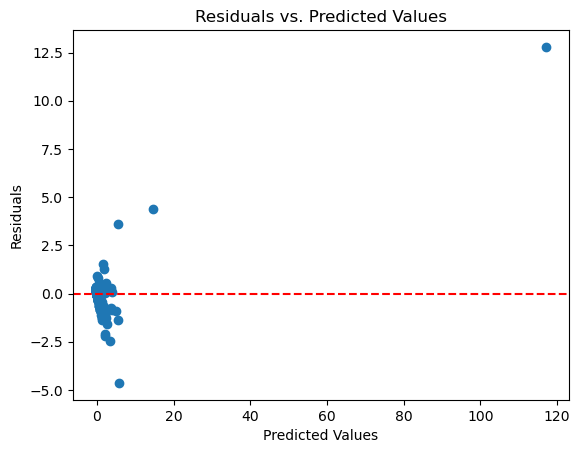

In [40]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

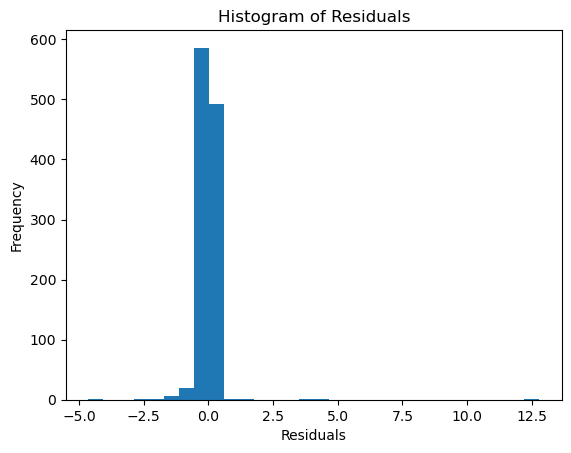

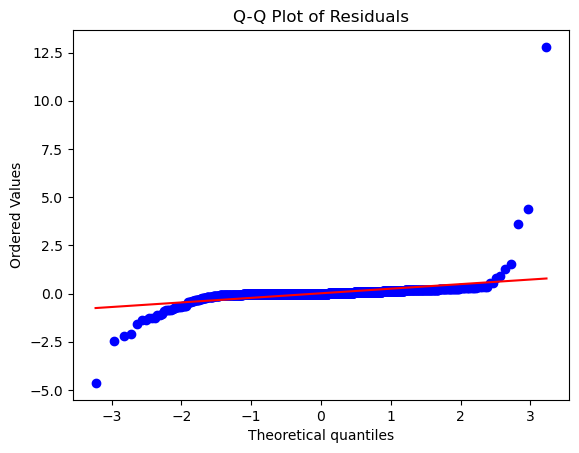

In [42]:
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [44]:
# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for the model's features
vif_data = calculate_vif(X_train)

print(vif_data)

    variables        VIF
0       const   1.816893
1  IBGE_15-59  10.089235
2      COMP_A   1.057832
3      COMP_F  16.328623
4      COMP_I  24.298544
5  Total_Bank   1.763792


**Problem Set 5**

In [64]:
"""
For this week's problem set you will use the same dataset set you created for PS4. First, if your PS4 model fit was poor (as it was for nearly everyone),
see if you can add any additional variables to create a better fitting OLS regression from last week. Second, do a comparison of three methods on the revised data:
single decision tree, a random forest, and an OLS linear regression.  As part of the above tasks, you should repeat your OLS evaluation on your new model specification,
and should evaluate your tree methods as discussed in class this week and listed below.

Evaluating a Regression Tree or Random Forest
Check fit with R-squared “score” 
Compare training and test scores for a gap indicating the problem of overfitting
Check fit with Root Mean Squared Error 
Useful for comparing fit across different methods
For single decision trees, visually examine the tree or tree text, and consider pruning strategies (max features, min samples depth, etc.)
For random forest, examine variable importance
In a markdown cell briefly summarize the comparison of these three supervised learning methods for your dataset, referencing specific features and predictions.

Note that you are also welcome to use new data if you wish.

You should submit an .ipynb file, and use a markdown field to very briefly note thoughts at each stage of the evaluation,
and finally what you think appropriate next steps would be for improving the model."""

"\nFor this week's problem set you will use the same dataset set you created for PS4. First, if your PS4 model fit was poor (as it was for nearly everyone),\nsee if you can add any additional variables to create a better fitting OLS regression from last week. Second, do a comparison of three methods on the revised data:\nsingle decision tree, a random forest, and an OLS linear regression.  As part of the above tasks, you should repeat your OLS evaluation on your new model specification,\nand should evaluate your tree methods as discussed in class this week and listed below.\n\nEvaluating a Regression Tree or Random Forest\nCheck fit with R-squared “score” \nCompare training and test scores for a gap indicating the problem of overfitting\nCheck fit with Root Mean Squared Error \nUseful for comparing fit across different methods\nFor single decision trees, visually examine the tree or tree text, and consider pruning strategies (max features, min samples depth, etc.)\nFor random forest, e

**Training Models**

In [75]:
# Establishing X and Y variables
X = Brazilian_McDonalds_Test_Data[['IBGE_15-59','COMP_A', 'COMP_F', 'COMP_I','Total_Bank']]
X = sma.add_constant(X)  # Adds a constant term to the predictors
y = Brazilian_McDonalds_Test_Data['MAC']

# OLS Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Brazilian_McDonalds__OLS_model = sma.OLS(y_train, X_train).fit()

# Single Decision Tree
Brazilian_McDonalds_dt_model = DecisionTreeRegressor(random_state=42)
Brazilian_McDonalds_dt_model.fit(X_train, y_train)

# Random Forest Trees
Brazilian_McDonalds_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
Brazilian_McDonalds_rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Performance Evaluation (OLS & Decision Trees)**

In [83]:
# OLS Linear Regression Predictions
Brazilian_McDonalds_ols_pred = Brazilian_McDonalds__OLS_model.predict(X_test)

# Single Decision Tree Predictions
Brazilian_McDonalds_dt_pred = Brazilian_McDonalds_dt_model.predict(X_test)

# Random Forest Trees Predictions
Brazilian_McDonalds_rf_pred = Brazilian_McDonalds_rf_model.predict(X_test)

In [89]:
# OLS Linear Regression Evaluation
Br_Mac_ols_mae = mean_absolute_error(y_test, Brazilian_McDonalds_ols_pred)
Br_Mac_ols_r2 = r2_score(y_test, Brazilian_McDonalds_ols_pred)

# Single Decision Tree Evaluation
Br_Mac_dt_mae = mean_absolute_error(y_test, Brazilian_McDonalds_dt_pred)
Br_Mac_dt_r2 = r2_score(y_test, Brazilian_McDonalds_dt_pred)

# Random Forest Trees Evaluation
Br_Mac_rf_mae = mean_absolute_error(y_test, Brazilian_McDonalds_rf_pred)
Br_Mac_rf_r2 = r2_score(y_test, Brazilian_McDonalds_rf_pred)

# Printing Evaluation Metrics
print(f"OLS MAE: {Br_Mac_ols_mae}, R^2: {Br_Mac_ols_r2}")
print(f"Decision Tree MAE: {Br_Mac_dt_mae}, R^2: {Br_Mac_dt_r2}")
print(f"Random Forest MAE: {Br_Mac_rf_mae}, R^2: {Br_Mac_rf_r2}")

OLS MAE: 0.1268669819012147, R^2: 0.9842233820379862
Decision Tree MAE: 0.1335125448028674, R^2: 0.751074171945166
Random Forest MAE: 0.11189964157706092, R^2: 0.6389779824693496


In [97]:
"""
# OLS Linear Regression Evaluation
"As indicated in the model, the R-squared (0.984) is high, which indicates that the model and predictors are a very good positive fit.
in The mean absolute error is also low, indicating that the magnitude of the error is small."

#Single Decision Tree Evaluation
"The decision tree model's R-squared is significantly lower (0.751), indicating that the model and the predictors might not have been as a
good a predictor as previously thought. The fit is moderate, but indicates less accuracy then the OLS linear regression evaluating, perhaps
indicating overfitting or underfitting based on the training data. The mean square error still remained low, indicating that the magnitude of
the error is small"

# Random Forest Trees Evaluation
"The random forest R-squared is significantly lower (0.639), indicating that while the model might be good for predicting values but it might fail
to capture variance within the dataset. Random forest trees should typically perform better than decision trees because it is an average of multiple
different single decision trees. The mean square again in still very low, indicating that the magnitude of error is small."

# Findings
In summary, the OLS linear regression model is the model with the best fit. Overall, based on the analysis from the single decision tree evaluation and
the random forest tree evaluation it seems that the model might be underfitted/overfitted and may need more variables to explain more of the variance.
The adjusted R-squared should be looked to as a unit of analysis rather than the R-squared value. The model suggests multiple potential positive correlations.

It seems that there may be a positive relationship between the number of agricultural businesses (COMP_A) in an city.
and the number of McDonalds in an area. This may be because agricultural businesses are the raw ingredient suppliers of McDonald's food.

There may positive be a relationship between the number of construction businesses and the number of McDonalds in an city.
McDonalds businsses may need to be built by construction businesses if they are not already being created in an existing stores.

There may be a positive relationship between the number of other food businesses in the area and the number of McDonalds in a city.
Food businsses located next to other food businesses could potentially bring revenue.

There may be a positive relationship between the number of McDonalds and population who is between 15 and 59 years of age in a city.
As there are more people in a city, McDonalds may want to create more stores to serve
individuals of that city.

There may be a positive relationships between the number of McDonalds amd total banks in the city.
More banks in a city may provide more opportunities for a potential McDonald's store owner to get funding.

"""

'\n# OLS Linear Regression Evaluation\n"As indicated in the model, the R-squared (0.984) is high, which indicates that the model and predictors are a very good positive fit.\nin The mean absolute error is also low, indicating that the magnitude of the error is small."\n\n#Single Decision Tree Evaluation\n"The decision tree model\'s R-squared is significantly lower (0.751), indicating that the model and the predictors might not have been as a\ngood a predictor as previously thought. The fit is moderate, but indicates less accuracy then the OLS linear regression evaluating, perhaps\nindicating overfitting or underfitting based on the training data. The mean square error still remained low, indicating that the magnitude of\nthe error is small"\n\n# Random Forest Trees Evaluation\n"The random forest R-squared is significantly lower (0.639), indicating that while the model might be good for predicting values but it might fail\nto capture variance within the dataset. Random forest trees shou